In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
data = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v2.json',lines=True) # lines for avoid the trailing error
column = data.columns
column

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date'], dtype='object')

In [3]:
data.drop(['link','date'],axis=1,inplace = True)
data.head(4)

category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   

           authors                                  short_description  
0  Melissa Jeltsen  She left her husband. He killed their children...  
1    Andy McDonald                           Of course it has a song.  
2       Ron Dicker  The actor and his longtime girlfriend Anna Ebe...  
3       Ron Dicker  The actor gives Dems an ass-kicking for not fi...

In [4]:
data.describe()

category        headline authors short_description
count     200853          200853  200853            200853
unique        41          199344   27993            178353
top     POLITICS  Sunday Roundup                          
freq       32739              90   36620             19712

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   authors            200853 non-null  object
 3   short_description  200853 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [6]:
print("The shape of the dataset-------->",data.shape)
print("The number of null values ------>")
print(data.isnull().sum())
column = data.columns
print("The column present there-------->",column)

The shape of the dataset--------> (200853, 4)
The number of null values ------>
category             0
headline             0
authors              0
short_description    0
dtype: int64
The column present there--------> Index(['category', 'headline', 'authors', 'short_description'], dtype='object')


# Category walkthrough

In [7]:
print("The total number category present here------------->",data['category'].nunique())
category=data['category'].value_counts()
print(category)

The total number category present here-------------> 41
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE 

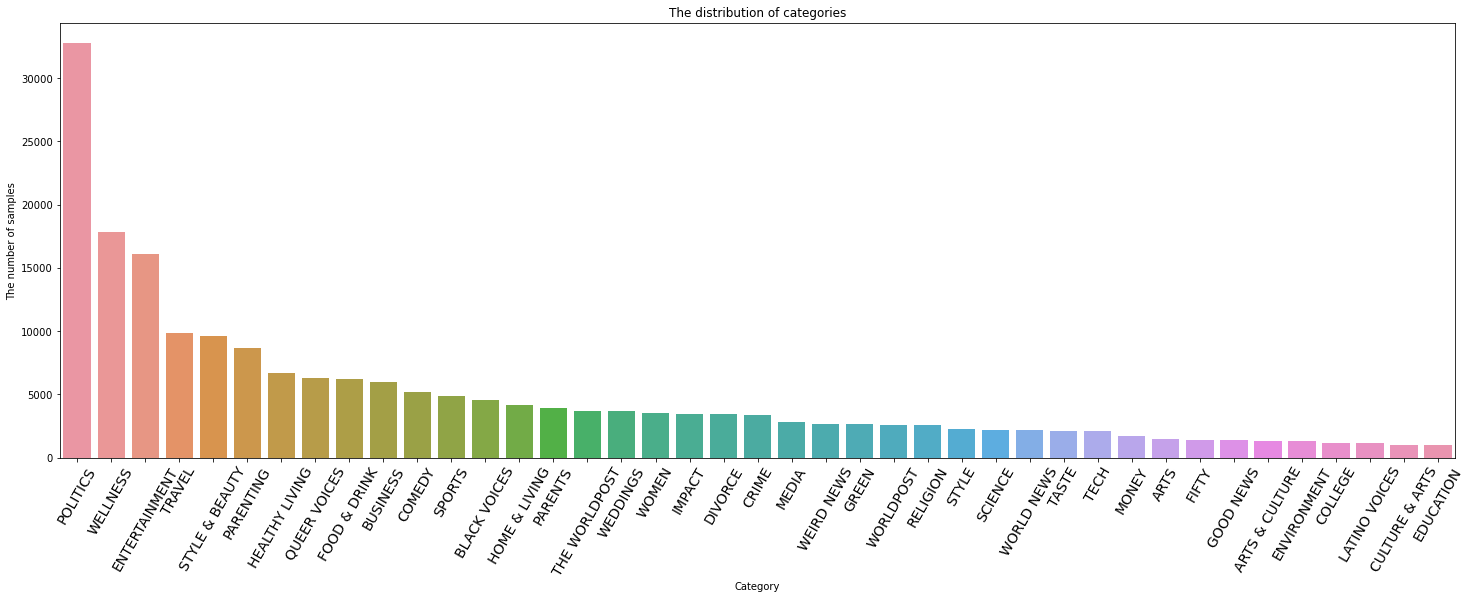

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

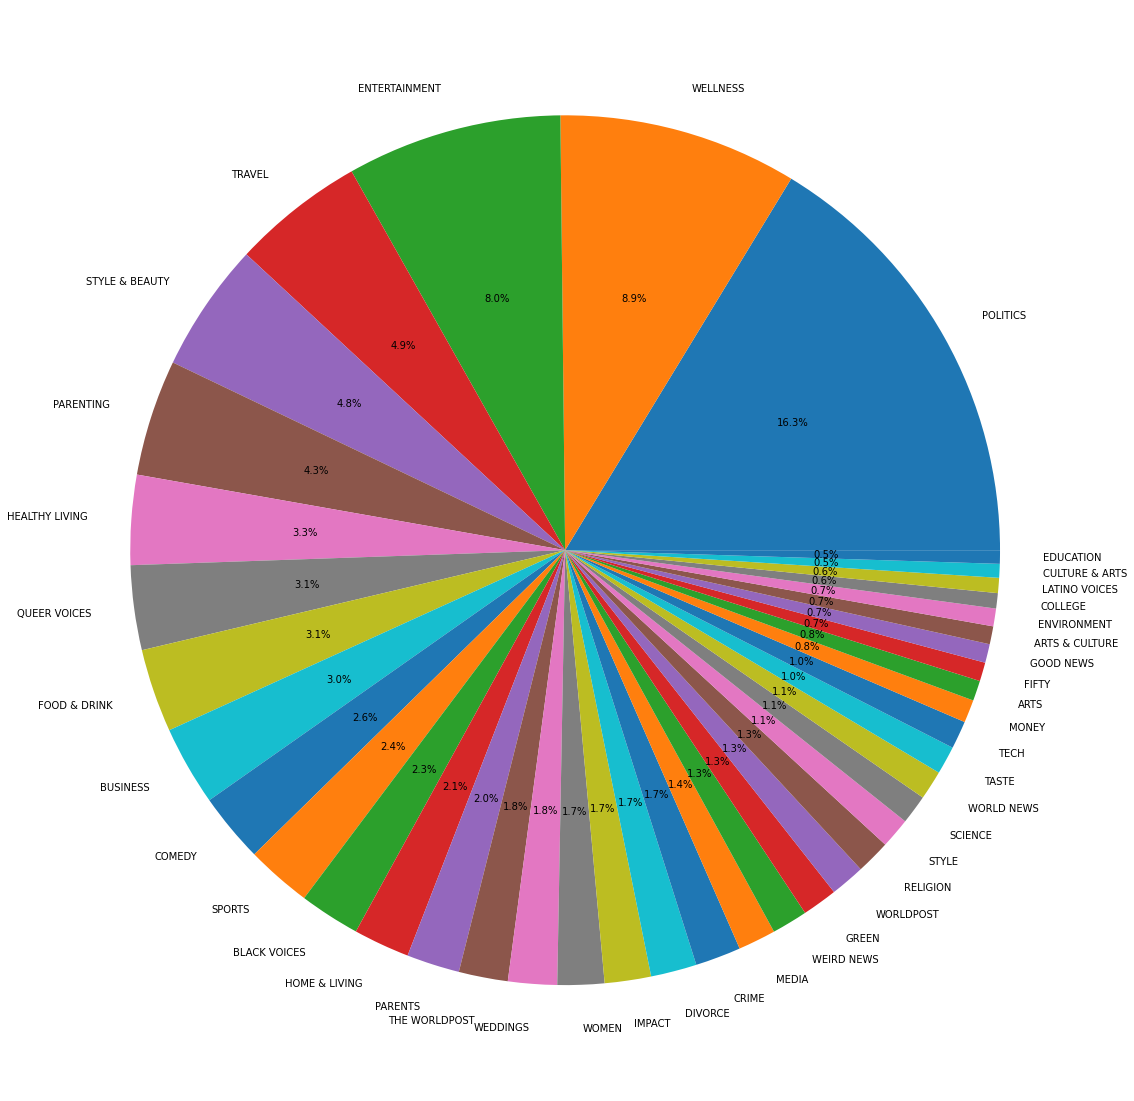

In [12]:
#pie chart 
plt.figure(figsize=(20,20))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()

# handling Dublicate and null values

In [22]:
#delete the dublicate values
data.duplicated().sum() # count the total duplicate samples

446

In [25]:
data.drop_duplicates(keep='last',inplace=True)

In [26]:
#there can be dublicate of author names so check for the dublicate headline and short discription
data.duplicated(subset=['headline', 'short_description']).sum()

42

In [29]:
data.drop_duplicates(subset=['headline', 'short_description'],inplace=True,keep='last')

In [30]:
print("THe length of the datset after dublicate deletion------>",data.shape)

THe length of the datset after dublicate deletion------> (200365, 4)


# Handling null values

In [31]:
data.isnull().sum()

category             0
headline             0
authors              0
short_description    0
dtype: int64

In [34]:
# there is no null value instead of null they are blank so we need to check for the blank placess and delete that
data[data['headline'] == '']

category headline  \
86893       RELIGION            
113471  QUEER VOICES            

                                                  authors  \
86893   Matthew Fox, ContributorRadical theologian Mat...   
113471  Gary Snyder, ContributorWriter and Media Strat...   

                                        short_description  
86893   Let everyone not wrapped in tired and disprove...  
113471

In [35]:
# drop the blank values
headline_blank = data['headline'] == ''
data = data[~headline_blank]
print("THe length of the datset ------>",data.shape)

THe length of the datset ------> (200363, 4)


In [36]:
#drop the blank short describtion column
description_blank = data['short_description']==''
print("the lenth of the blank description samples----->",len(description_blank))
data = data[~description_blank]
print("THe length of the datset ---------------------->",data.shape)

THe length of the datset ------> (180753, 4)


In [37]:
#drop the null author samples
author_blank = data['authors']==''
print("the lenth of the blank auhtor samples----->",len(author_blank))

the lenth of the blank description samples-----> 180753


In [ ]:
data[author_blank]